# リスボンの卸売業者が顧客から集めたデータ分析

# 導入 
## 教師なし学習とは何か記述せよ

- 教師あり学習は、すでに正解ラベルがあるデータを基に学習を行い、ラベリングされていないデータのラベリングを予測することを目的とするもので、回帰と分類の二つがある。一方、教師なし学習は正解ラベルがないデータに対して、データ内の隠れたパターンや、内部構造を発見するための機械学習のアルゴリズムである。

- シーケンス解析や遺伝子クラスタリングといったバイオインフォマティックス分野、系列やパターンのマイニングといったデータマイニングの分野、画像のセグメンテーションといった医療画像処理の分野、物体認識といったコンピュータビジョンの分野で用いられている。また、ECサイトでカスタマーの購入情報や閲覧情報を学習させることで、カスタマーの購入傾向、興味関心のある分野をクラスタリングし嗜好性として分析し、「あなたへのオススメ」などのリコメンデーション機能として活用されている。

- 代表的な手法に以下のものがある。　 
  - クラスタリング
  - 主成分分析
  - 自己組織化マップ
  - ベクトル量子化
>https://jp.mathworks.com/discovery/unsupervised-learning.html
>https://tech-clips.com/article/421516
>https://ai-kenkyujo.com/term/unsupervised-learning/

 ## 必要なライブラリをimport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

 # データ取得

In [2]:
#csvを読み込むコードを記述
data =pd.read_csv('./Wholesale customers data.csv')

## データを眺める

In [3]:
print("サンプルの数：{} 　特徴量の数：{}\n".format(*data.shape))
print("各特徴量の型\n",data.dtypes,"\n")
print("統計量の要約")
display(data.describe())
display(data.head())

サンプルの数：440 　特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


## 不要な特徴量を消す

In [5]:
#元のデータはdata_originalに格納しておく
data_original = data.copy()

In [6]:
#dataからChannelとRegionの2列を削除するコードを記述
data=data.drop(['Channel','Region'],axis=1)
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## scatter matrixを描く

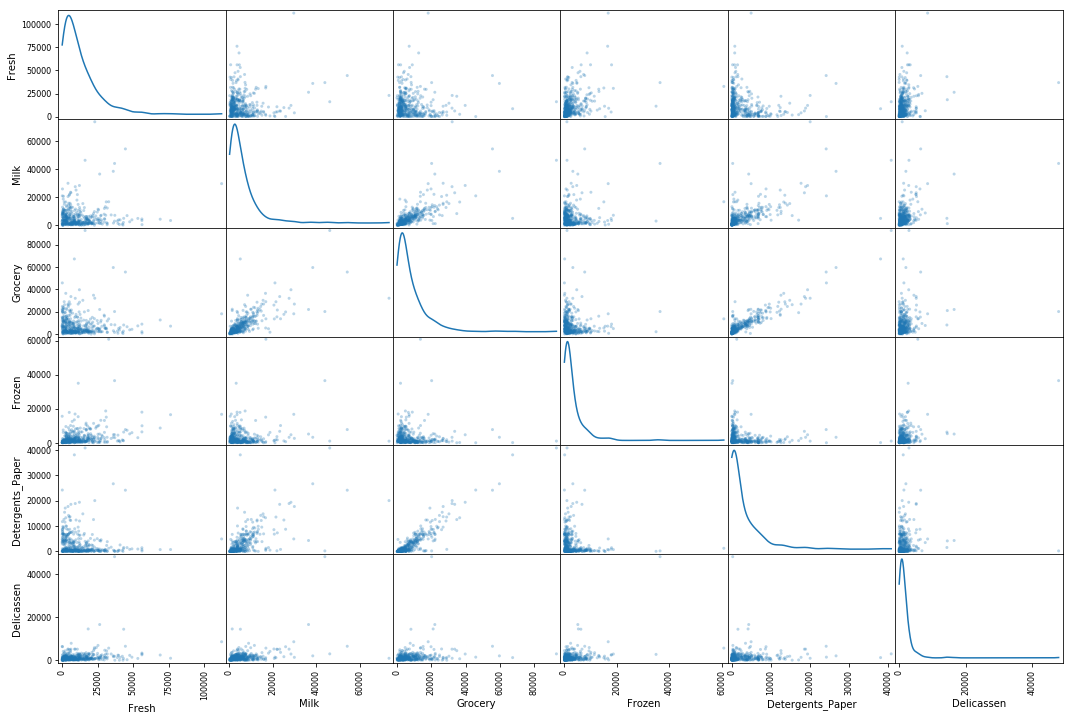

In [7]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (18,12), diagonal = 'kde');

# Feature Scaling

dataをlog変換して変数data_fsに格納。

In [8]:
#dataに対して適切なFeature Scalingを行うコードを記述
import numpy as np
data_fs=np.log(data)

data_fsの中身を確認。

In [9]:
data_fs.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


## なぜFeature Scalingが必要なのか記述せよ

今回のデータでは、Fresh、Milk、Grocery 、Frozen、Detergents_Paper、Delicassenの６個の特徴量があるが、各平均で比較すると、Freshと Delicassen間で約８倍、Groceryとの間で約５倍の開きがある。  
多くの機械学習の手法で使用する勾配降下法にこのままデータを使用し学習した場合、パラメータ間で更新幅にかたよりが生じてしまう。
そうなると、学習が収束パフォーマンスが下がったり、得られたモデルの精度が悪くなるという弊害が起こる。  
そのため、標準化などの手法を使って特徴間のスケールを一定の範囲に揃えて、計算を行うためにFeature Scalingが必要になってくる。

今回の与えられた元のデータプロットをみると、ほぼ全てにおいてデータが左下に固まってことが確認できる。この原因は二つの特徴量間のスケール差の大きさからきていると考えられる。
このままでは、今回の目的であるクラスタリング、つまりデータをいくつかの塊に分けて可視化することが困難であるため、データの可視化の観点から今回はフィーチャースケーリングを行う。

 log変換を行なった理由は、今回の値の最小値が１なので対数を取ると妥当だと考えたから。

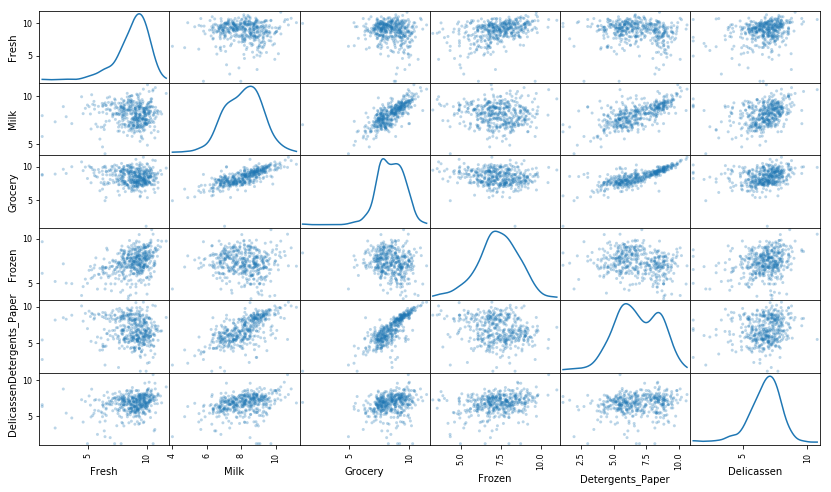

In [10]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Feature Extraction

## PCAの実行

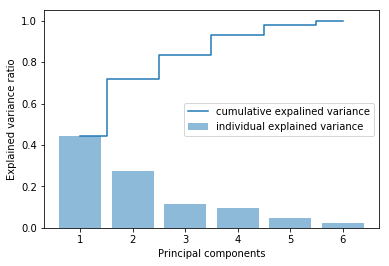

In [11]:
#data_fsに対しPCAを行い分散説明率の累積を確認
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# PCAを施して学習
# pca = PCA(n_components=3)
# data_fs = pca.fit_transform(data_fs)


pca = PCA(n_components=None)
data_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [12]:
eigenvectors = pca.components_
print("固有ベクトル")
print(eigenvectors)

固有ベクトル
[[ 0.17371704 -0.394463   -0.45436364  0.17219603 -0.74551495 -0.1494356 ]
 [-0.68513571 -0.16239926 -0.06937908 -0.487691   -0.04191162 -0.50970874]
 [-0.67351166  0.03306794 -0.03218274  0.28481122 -0.21824404  0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [-0.00082162  0.72228834  0.34799325 -0.03624337 -0.56366476 -0.19536639]
 [-0.02927638  0.54303508 -0.81390826 -0.0174477   0.20244363 -0.02283197]]


In [13]:
#固有値（各主成分におけるデータの分散）
eigenvalue= pca.explained_variance_
eigenvalue

array([ 4.83781898,  3.02459061,  1.27047648,  1.05179707,  0.50039796,
        0.25095302])

第1主成分と第２主成分で７０％超えていることが確認できる。

In [14]:
(eigenvalue[0] + eigenvalue[1]) / np.sum(eigenvalue)

0.7189452317370727

In [15]:
#分散説明率が70%を超える数の主成分を選び、data_pcaに格納する
data_pca= eigenvectors[0:2]
data_pca

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

## なぜPCAを行うのか記述せよ
- 次元削減により、クラスタリングで使用する次元を絞込み、可視化しやすくするため。
- 扱う特徴量(次元)が多すぎる場合には、機械学習モデルが効率よく回帰または分類ができない問題が発生する（「次元の呪い」ともいわれる）ため、問題回避のためにPCAで次元削減を行い、特徴量数を調整し学習の精度向上や高速化を行う必要があるため。

## クラスタリングとは何か記述せよ
### 回答
  クラスタリングとはデータの集合をクラスタという部分集合に分ける手法。  
  
  クラスタリングが使用されるシーンとしては、教師あり学習の前処理やECサイトで購買記録から顧客を分類し、販売戦略を考えたり、アンケートなどの文章を分類し、どういった内容のものがあるかを考えたり、不良品を分類し工程の管理方法を考える場合などがある。いずれも人間が分け方を知らないデータをクラスタリングで分類し、今まで気づかなかった人間にとって有用な情報を発見することに用いられる。  
  
  クラスタリングには大きくは非階層的手法と階層的手法の二種類がある。非階層的手法とは分類の数を予め人間が決定して分類する手法で大量のデータを扱う場合には向いている。 一方、階層的手法にはそれがないが、単純かつ自然な手法を取り入れており、例えば樹状図を描き可視化できるという利点もあるが、データ数が増えると計算量が膨大になるという欠点もある。  
  
  クラス分類の場合は、事前に答えである分類が用意されていて、そこにデータを正しく分類していけばいいが、反対にクラスタリングには答えに当たる分類が与えて用意されていないため、人間がデータを様々な手法を活用して適切に分類し、その結果にどんな意味があるか解釈することが必要になる。
 

## 樹状図を描く

### ward法を採用する

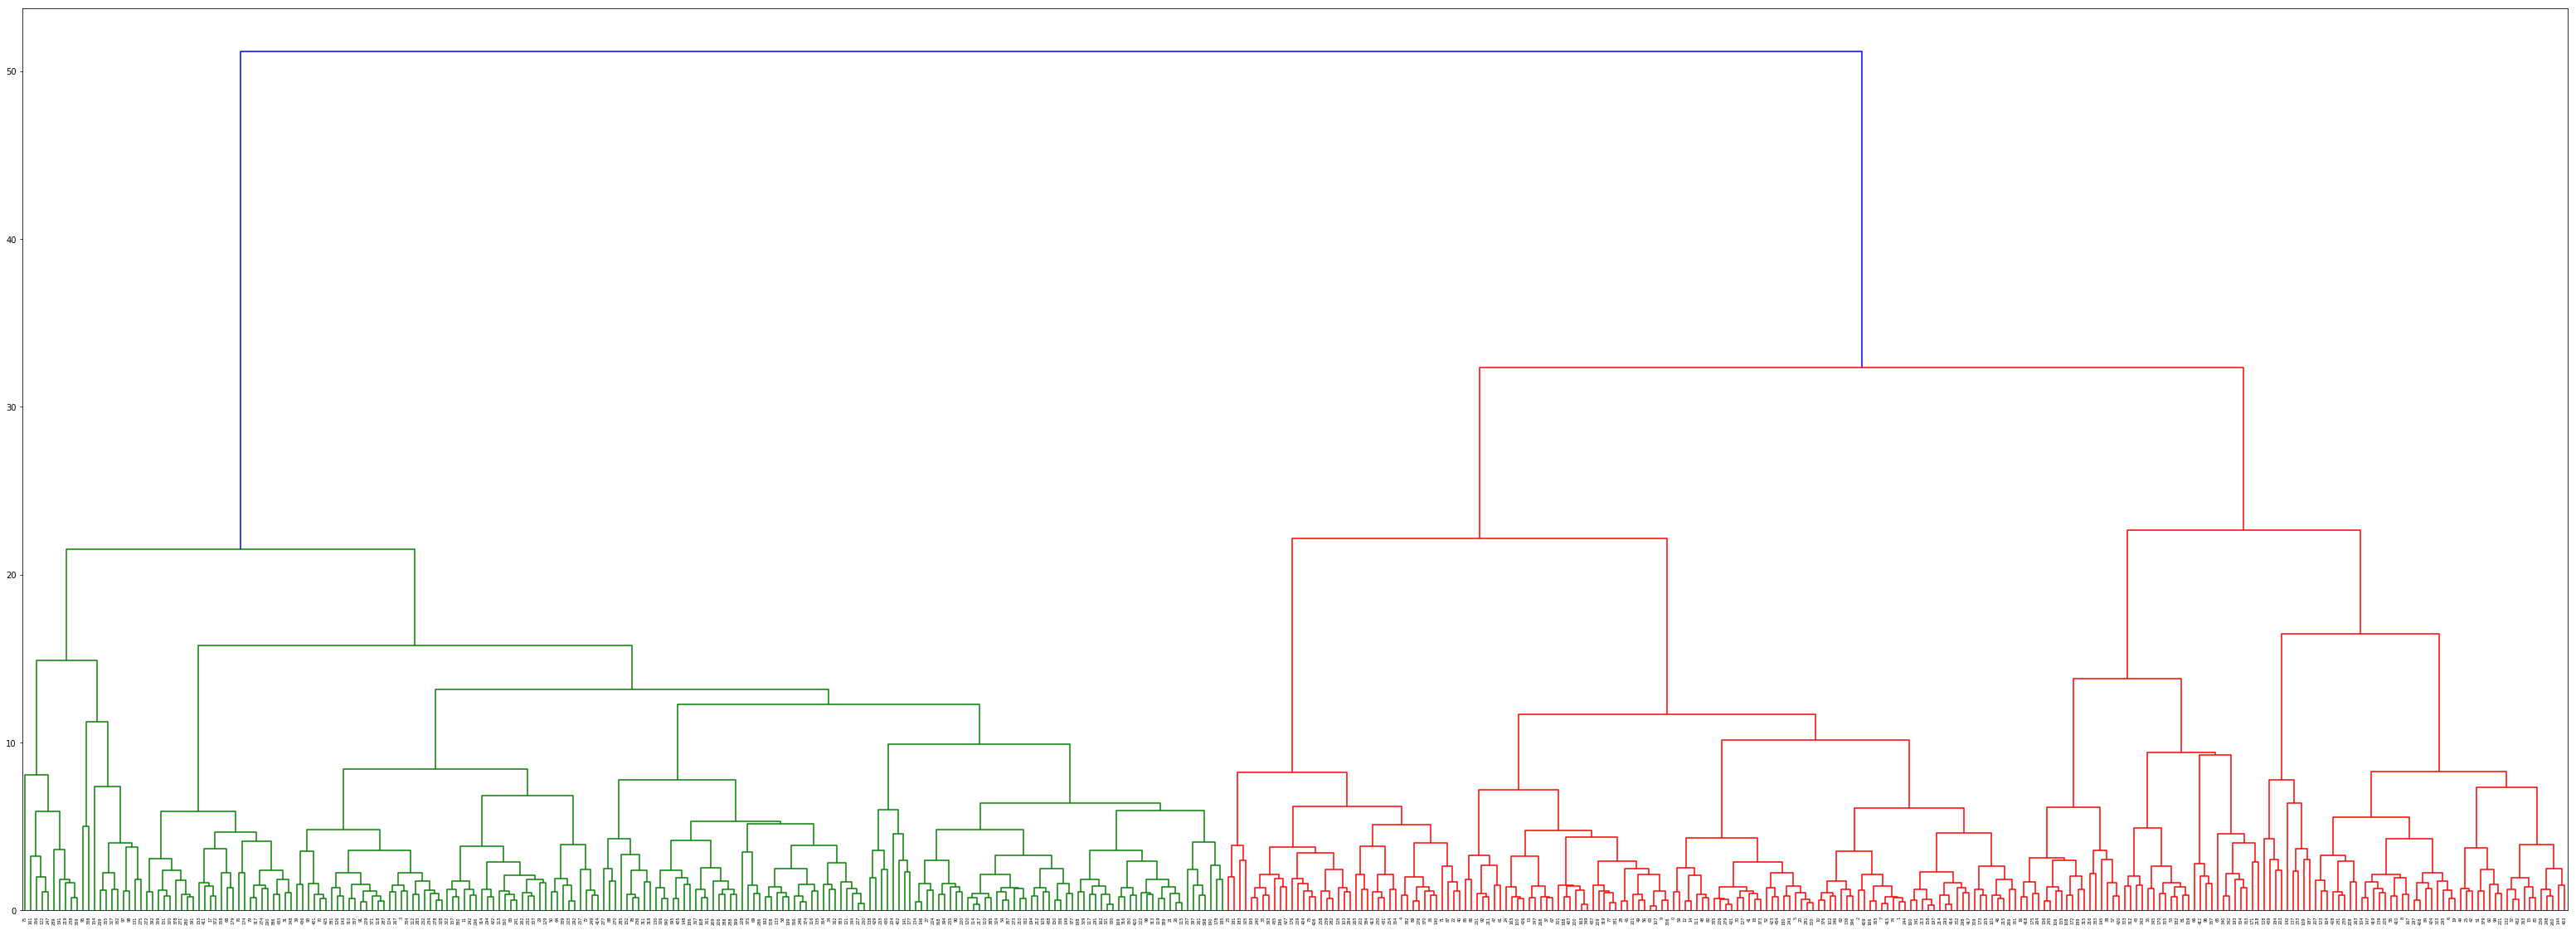

In [16]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#ward法を使う
plt.figure(figsize=(55,20))

row_clusters = linkage(data_fs, method='ward')
row_dender = dendrogram(row_clusters)

plt.show()

 ## k-meansにおけるkの値の検討
  ### エルボー法

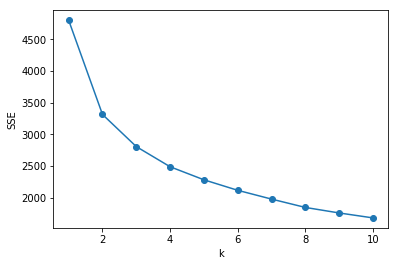

In [17]:
#クラスタ数を検討するためのコードを記述
#エルボー法
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_fs)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### シルエット分析

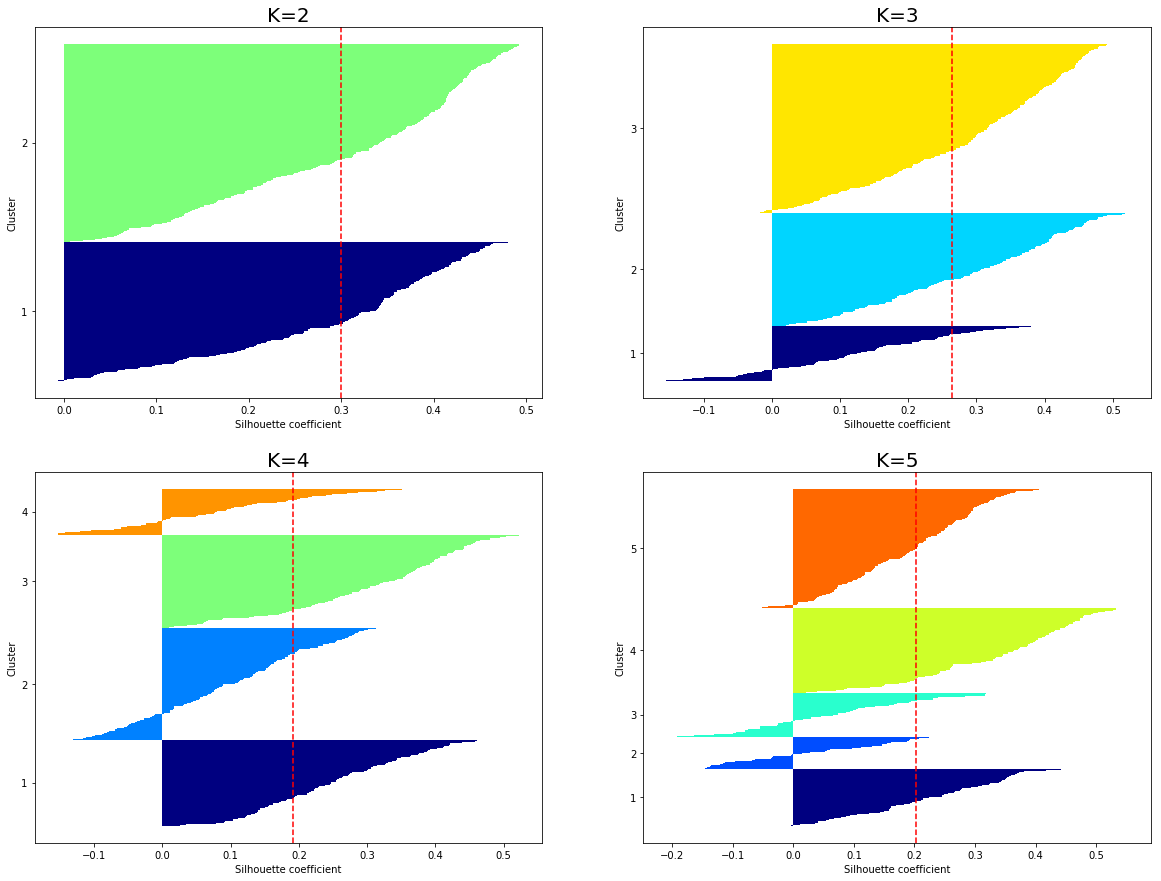

In [18]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

plt.figure(figsize=(20,15))
for j in range(2,6):
    plt.subplot(2,2,j-1)
    km = KMeans(n_clusters=j, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(data_fs)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_fs, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title('K='+str(j),fontsize=20)
plt.show()


## <b>k=2</b>  
理由：エルボー法の図から、k=2からk=3にかけての傾きがk=2までのそれよりも若干緩やかに変化していることが確認できる。
シルエット分析もn_clusters=2にしたときの二つのクラスタの厚さがほぼ似ているのに対して、n_clusters=3の場合の図ではクラスタの厚さが不均等で、かつ、一番下のクラスタにマイナス値の領域に入っているデータポイントが存在し、間違ったクラスタに所属している可能性が高いことが伺える。  
以上から、エルボー法とシルエット分析の結果、k=2が最適だと考えられる。

## k-meansの実行
決定したkの値を使いkmeansを実行し、結果をy_kmに格納する。

In [19]:
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_fs)

In [29]:
data_fs.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


## クラスタリングの可視化

以下３つの散布図のｘ軸とｙ軸は、それぞれPCAによって導かれた第一主成分軸、第二主成分軸になる。

In [20]:
#散布図を描くコードを記述
#中心点もプロットする
pca_vector = data_pca
pca_vector

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

 2つにクラスタリングしたデータと、regionで分類したデータ、そしてChannelで分類したデータを順番にプロットする。すると、クラスタリングしたデータと、Channelで分類したデータの分布がよく似ていることがわかる。

## 2グループにクラスタリングしたデータをプロット

In [21]:
data_pca = np.dot(　data_fs　, pca_vector.T　)

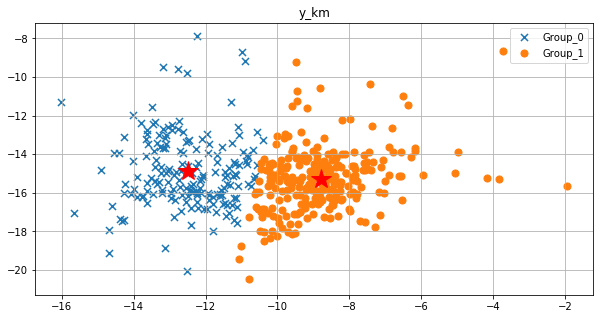

In [26]:
plt.figure(figsize =(10,5))
plt.title('y_km')

data_zero = data_pca[y_km==0]
data_one = data_pca[y_km==1]

# plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50)
plt.scatter(data_zero[:,0], data_zero[:,1], marker='x', s=50, label='Group_0')
plt.scatter(data_one[:,0], data_one[:,1], marker='o', s=50, label='Group_1')
plt.grid()
plt.hold(True)
centroid = np.dot(km.cluster_centers_, pca_vector.T)
plt.plot(centroid[:,0], centroid[:,1], "*", MarkerSize =20, MarkerFaceColor = 'r', MarkerEdgeColor = 'r')
plt.legend()
plt.show()

## regionで分類したデータでプロット

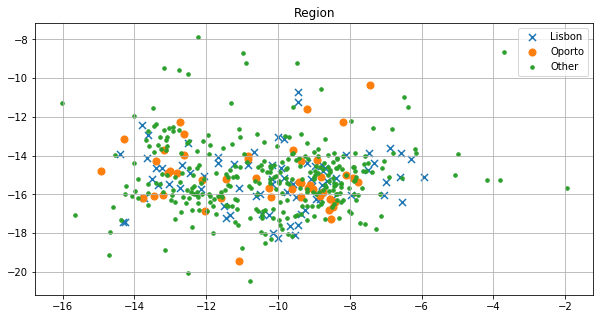

In [30]:
plt.figure(figsize =(10,5))
plt.title('Region')

data_Lisbon= data_pca[data_original["Region"]==1]
data_Oporto = data_pca[data_original["Region"]==2]
data_Other = data_pca[data_original["Region"]==3]

plt.scatter(data_Lisbon[:,0], data_Lisbon[:,1], marker='x', s=50, label='Lisbon')
plt.scatter(data_Oporto[:,0], data_Oporto[:,1], marker='o', s=50, label='Oporto')
plt.scatter(data_Other[:,0], data_Other[:,1],marker='.', s=50, label='Other')

plt.grid()
# plt.hold(True)
#centroid = np.dot(km.cluster_centers_, pca_vector.T)
#plt.plot(centroid[:,0], centroid[:,1],"*", MarkerSize =20, MarkerFaceColor = 'r', MarkerEdgeColor = 'r')
plt.legend()
plt.show()

## Channelで分類したデータをプロット

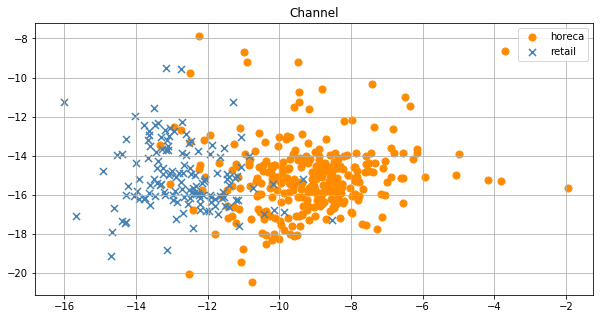

In [31]:
plt.figure(figsize =(10,5))
plt.title('Channel')

data_horeca= data_pca[data_original["Channel"]==1]
data_retail = data_pca[data_original["Channel"]==2]

plt.scatter(data_horeca[:,0], data_horeca[:,1], marker='o', color= 'darkorange', s=50, label='horeca')
plt.scatter(data_retail[:,0], data_retail[:,1], marker='x', color='steelblue', s=50, label='retail')

plt.grid()
# plt.hold(True)
# centroid = np.dot(km.cluster_centers_, pca_vector.T)
# plt.plot(centroid[:,0], centroid[:,1], "*", MarkerSize =20, MarkerFaceColor = 'r', MarkerEdgeColor = 'r')
plt.legend()
#plt.show()

In [32]:
data_y_km =pd.concat([data_original,pd.DataFrame(y_km)],axis=1)

各データごとに合計金額を表す'TotalPrice'を計算し、特徴量として加える。

In [33]:
data_y_km['TotalPrice']= data_y_km['Fresh']+data_y_km['Milk']+data_y_km['Grocery']+\
                                               data_y_km['Frozen']+data_y_km['Detergents_Paper']+data_y_km['Delicassen']

In [34]:
data_original['TotalPrice']= data_original['Fresh']+data_original['Milk']+data_original['Grocery']+\
                                               data_original['Frozen']+data_original['Detergents_Paper']+data_original['Delicassen']

In [35]:
df_group0 = data_y_km[data_y_km[0] == 0].describe()
df_group1 = data_y_km[data_y_km[0] == 1].describe()
df_group0 = df_group0.drop(0, axis=1).loc['mean','Fresh':]
df_group1 = df_group1.drop(0, axis=1).loc['mean','Fresh':]

In [36]:
data_original['TotalPrice']= data_original['Fresh']+data_original['Milk']+data_original['Grocery']+\
                                               data_original['Frozen']+data_original['Detergents_Paper']+data_original['Delicassen']
df_horeca=data_original[data_original['Channel']==1].describe()
df_retail=data_original[data_original['Channel']==2].describe()
df_horeca = df_horeca.loc['mean','Fresh':]
df_retail = df_retail.loc['mean','Fresh':]

####  各商品カテゴリーの平均金額でグループと業種で棒グラフにプロットして可視化してみると、グループ０と小売店、グループ１とhorecaが同じような傾向があることが分かる。

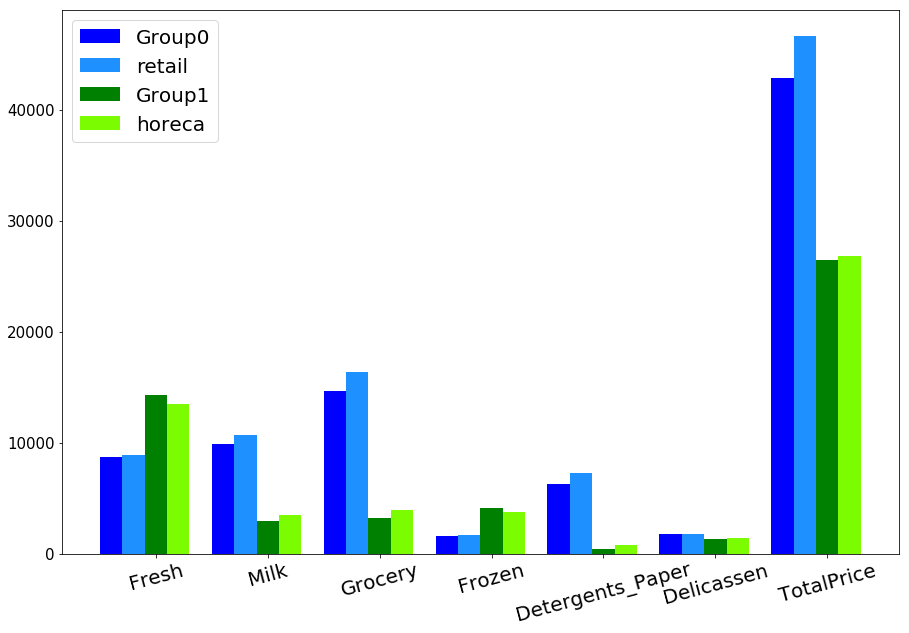

In [37]:
# plt.figure(figsize=(20,20))

plt.figure(figsize=(15,10))

X1=[0,1.5,3.0,4.5,6.0,7.5,9.0]
width = [0.3,0.3,0.3,0.3,0.3,0.3,0.3]
X2 = list(np.array(X1)+np.array(width))
X3 = list(np.array(X2)+np.array(width))
X4 = list(np.array(X3)+np.array(width))

plt.bar(X1, df_group0, color='b', width=0.3, label='Group0')
plt.bar(X2,df_retail, color='dodgerblue', width=0.3, label='retail')
plt.bar(X3,df_group1, color='g', width=0.3, label='Group1')
plt.bar(X4,df_horeca, color='lawngreen', width=0.3, label='horeca')

# 凡例
plt.legend(loc=2, fontsize=20)

# X軸の目盛りを置換
plt.xticks(list(np.array(X1)+np.array(width)*2), list(data_original.columns[2:]), fontsize = 20, rotation=15)
plt.yticks(fontsize = 15)
plt.show()

下の図では'Group0','retail','Group1','horeca' ごとに６つの商品カテゴリーの売上の平均を積み上げ棒グラフで表示。
散布図などと同様、'Group0'と'retail','Group1'と'horeca'の各商品カテゴリーの平均金額が非常に似ていることが確認できる。

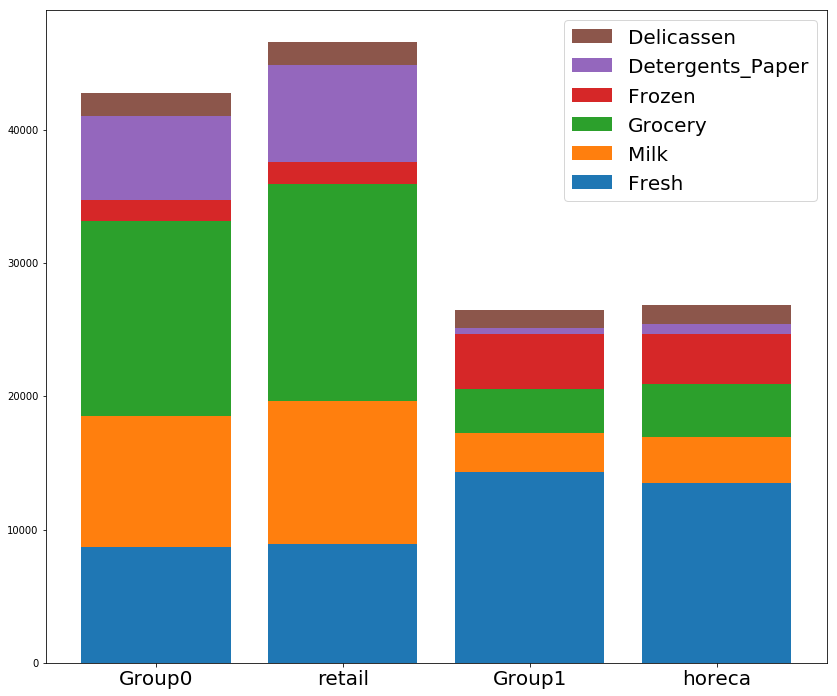

In [38]:
plt.figure(figsize=(14,12))

data = []
bar = []
labels=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
positions = range(1, 5) #x軸の位置
len_column  = 6#len(df_group0.columns)
for i in range(len_column):
    data.append(np.array([df_group0[i], df_retail[i], df_group1[i], df_horeca[i]]))
    bottom = np.array([.0, .0, .0, .0])
    for j in range(i):
        bottom += data[j]
    bottom
    if i == 0:
        bar.append(plt.bar(positions, data[i], align = 'center'))
    else:
        bar.append(plt.bar(positions, data[i], align = 'center', bottom = bottom)) 
    
x_labels = ['Group0', 'retail', 'Group1','horeca'] #x軸に表示するラベル

plt.xticks(positions, x_labels,fontsize=20) #x軸の値の変更

plt.legend((bar[::-1]),labels[::-1],fontsize=20) #凡例の表示
plt.style.use('ggplot')
plt.show() #グラフの表示

# 卸売業者への報告

- 上の散布図と棒グラフから、クラスタリングで二つに分けたグループとchannel（horecaとretail）が近い傾向があることがわかる。
- 小売店はミルク、食料品、洗剤と紙類がよく売れる傾向があり、horeca(ホテル　レストラン　カフェ）は生鮮食品と冷凍食品がよく売れる傾向がある。
-　　同様に、Group0はGroup1よりもミルク、食料品、洗剤と紙類がよく売れる一方、Group1もGroup0より生鮮食品と冷凍食品がよく売れる傾向があることがわかる。
-　　以上から卸先は大きくAとBのグループに分けることができ、Aは購買金額が大きく、品目にミルク、食料品、洗剤と紙類の購入比率が高い傾向がある一方、Bは購買金額はAより比較的少なく、生鮮食品と冷凍食品の購入比率が高い傾向がある。
- よって、顧客にDMを送る場合、２グループの購入傾向を反映した内容を作成した方が、効果が見込まれる可能性が高いと考えられる。